# **Entrega 1 - Gestión de Datos**

Pontificia Universidad Javeriana
Semestre 2310

*   Jorge Esteban Castañeda López
*   Miguel Ángel Gutiérrez Ibagué
*   Abelardo Valdivieso Acevedo

# **1.   Descripción de los datos**





In [ ]:
!pip install pandas-profiling --upgrade
!pip install pylev

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 KB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 344.5/344.5 KB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 58.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 KB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 KB 27.5 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=472ee51344c9f0faaf549a9af36613556c874141ad91697ff5b35ab43a6716cf
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempti

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import re

from ydata_profiling import ProfileReport

from datetime import datetime

%matplotlib inline

In [ ]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [ ]:
# Cargando los artistas
artists_df = pd.read_csv('artists_mod.csv')

In [ ]:
# Cargando los tracks
tracks_df = pd.read_csv('tracks_mod.csv')

In [ ]:
artists_df.shape

(1162095, 5)

In [ ]:
tracks_df.shape

(586672, 20)

In [ ]:
artists_df.dtypes

id             object
followers     float64
genres         object
name           object
popularity      int64
dtype: object

In [ ]:
artists_df.head(5)

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [ ]:
tracks_df.dtypes

id                   object
name                 object
popularity          float64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                 float64
loudness            float64
mode                float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature      float64
dtype: object

In [ ]:
tracks_df.head(5)

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6.0,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.445,0.0,-13.338,1.0,0.4510,0.674,0.7440,0.151,0.127,104.851,3.0
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0.0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.263,0.0,-22.136,1.0,0.9570,0.797,0.0000,0.148,0.655,102.009,1.0
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0.0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.177,1.0,-21.180,1.0,0.0512,0.994,0.0218,0.212,0.457,130.418,5.0
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,NaN,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,NaN,7.0,-27.961,1.0,0.0504,0.995,0.9180,0.104,0.397,169.980,3.0
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0.0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.158,3.0,-16.900,0.0,0.0390,0.989,0.1300,0.311,0.196,103.220,4.0


# **2.   Limpieza y calidad de datos**

# Artistas

In [ ]:
# Validando nulos en columnas de artists
[(c, artists_df[c].isnull().values.any()) for c in artists_df.columns]

[('id', False),
 ('followers', True),
 ('genres', False),
 ('name', False),
 ('popularity', False)]

In [ ]:
# Limpiando los nulos en la columna de followers con -1 para seguidores nulos
artists_df['followers'] = artists_df['followers'].fillna(-1)

In [ ]:
# Validando nuevamente la columna
[(c, artists_df[c].isnull().values.any()) for c in artists_df.columns]

[('id', False),
 ('followers', False),
 ('genres', False),
 ('name', False),
 ('popularity', False)]

In [ ]:
# Validando valores de formatos en géneros y popularidad
print(artists_df['genres'].unique())
print(artists_df['popularity'].unique())

['[]' "['carnaval cadiz']" "['classical harp', 'harp']" ...
 "['dark post-punk', 'french post-punk', 'polish post-punk']"
 "['pop punk', 'tulsa indie']"
 "['clean comedy', 'deep comedy', 'new comedy']"]
[  0   8   6   5   7   3   2   9  16  19  15  27  26  22  34  53  51  52
  56  57  32  37  41  31  49  47  66  59  63  12  11  40   1  58  24  23
  48  14  13  25  18  20  17  28  30  21  36  29  35  33  38  39  44  42
  43  45  55  46   4  10  60  65  50  54  62  64  61  89  67  83  72  69
  70  78  68  77  71  84  80  76  75  81  79  73  74  90  86  85  82  87
  92  98  96  95  91  88  93 100  94]


# Tracks

In [ ]:
# Validando nulos en columnas de tracks
[(c, tracks_df[c].isnull().values.any()) for c in tracks_df.columns]

[('id', False),
 ('name', True),
 ('popularity', True),
 ('duration_ms', False),
 ('explicit', False),
 ('artists', False),
 ('id_artists', False),
 ('release_date', False),
 ('danceability', True),
 ('energy', True),
 ('key', True),
 ('loudness', True),
 ('mode', True),
 ('speechiness', True),
 ('acousticness', True),
 ('instrumentalness', True),
 ('liveness', True),
 ('valence', True),
 ('tempo', True),
 ('time_signature', True)]

In [ ]:
# Limpiando los nulos en la columna de nombre con NN para canciones sin nombre
tracks_df['name'] = tracks_df['name'].fillna('NN')

# Limpiando los nulos en la columna de popularidad con -1 para canciones sin popularidad conocida
tracks_df['popularity'] = tracks_df['popularity'].fillna(-1)

# Limpiando los nulos en la columna de danceability con -1 para canciones sin danceability conocida
tracks_df['danceability'] = tracks_df['danceability'].fillna(-1)

# Limpiando los nulos en la columna de energía con -1 para canciones sin energía conocida
tracks_df['energy'] = tracks_df['energy'].fillna(-1)

# Limpiando los nulos en la columna de key con -1 para canciones sin key conocida
tracks_df['key'] = tracks_df['key'].fillna(-1)

# Limpiando los nulos en la columna de loudness con 1 para canciones sin loudness conocida
tracks_df['loudness'] = tracks_df['loudness'].fillna(1)

# Limpiando los nulos en la columna de mode con -1 para canciones sin mode conocido
tracks_df['mode'] = tracks_df['mode'].fillna(-1)

# Limpiando los nulos en la columna de speechiness con -1 para canciones sin speechiness conocida
tracks_df['speechiness'] = tracks_df['speechiness'].fillna(-1)

# Limpiando los nulos en la columna de acousticness con -1 para canciones sin acousticness conocida
tracks_df['acousticness'] = tracks_df['acousticness'].fillna(-1)

# Limpiando los nulos en la columna de instrumentalness con -1 para canciones sin instrumentalness conocida
tracks_df['instrumentalness'] = tracks_df['instrumentalness'].fillna(-1)

# Limpiando los nulos en la columna de liveness con -1 para canciones sin liveness conocida
tracks_df['liveness'] = tracks_df['liveness'].fillna(-1)

# Limpiando los nulos en la columna de valence con -1 para canciones sin valence conocida
tracks_df['valence'] = tracks_df['valence'].fillna(-1)

# Limpiando los nulos en la columna de tempo con -1 para canciones sin tempo conocido
tracks_df['tempo'] = tracks_df['tempo'].fillna(-1)

# Limpiando los nulos en la columna de time_signature con -1 para canciones sin time_signature conocida
tracks_df['time_signature'] = tracks_df['time_signature'].fillna(-1)

In [ ]:
# Validando nuevo estado de columnas
[(c, tracks_df[c].isnull().values.any()) for c in tracks_df.columns]

[('id', False),
 ('name', False),
 ('popularity', False),
 ('duration_ms', False),
 ('explicit', False),
 ('artists', False),
 ('id_artists', False),
 ('release_date', False),
 ('danceability', False),
 ('energy', False),
 ('key', False),
 ('loudness', False),
 ('mode', False),
 ('speechiness', False),
 ('acousticness', False),
 ('instrumentalness', False),
 ('liveness', False),
 ('valence', False),
 ('tempo', False),
 ('time_signature', False)]

In [ ]:
# Validando posibles formatos numericos invalidos
track_numeric_columns = ['popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature']
[(c, tracks_df[c].dtype.kind in 'iufcb') for c in track_numeric_columns]

[('popularity', True),
 ('duration_ms', True),
 ('danceability', True),
 ('energy', True),
 ('key', True),
 ('loudness', True),
 ('speechiness', True),
 ('acousticness', True),
 ('instrumentalness', True),
 ('liveness', True),
 ('valence', True),
 ('tempo', True),
 ('time_signature', True)]

In [ ]:
# Creando lambda para validar release_date
dateparse = lambda x: datetime.strptime(x, "%Y-%m-%d")

In [ ]:
# Función para validar si se encuentra algún error en el dataset
def error_in_format(x):
    try:
        datetime.strptime(x, "%Y-%m-%d")
        return False
    except:
        return True

In [ ]:
tracks_df.loc[tracks_df['release_date'].apply(error_in_format)]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0.0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3.0,-16.900,0.0,0.0390,0.989,0.13000,0.3110,0.1960,103.220,4.0
5,0BRXJHRNGQ3W4v9frnSfhu,Ave Maria,0.0,178933,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.227,0.2610,5.0,-12.343,1.0,0.0382,0.994,0.24700,0.0977,0.0539,118.891,4.0
6,0Dd9ImXtAtGwsmsAD69KZT,La Butte Rouge,0.0,134467,0,['Francis Marty'],['2nuMRGzeJ5jJEKlfS7rZ0W'],1922,0.510,0.3550,4.0,-12.833,1.0,0.1240,0.965,0.00000,0.1550,0.7270,85.754,5.0
7,0IA0Hju8CAgYfV1hwhidBH,La Java,0.0,161427,0,['Mistinguett'],['4AxgXfD7ISvJSTObqm4aIE'],1922,0.563,0.1840,4.0,-13.757,1.0,0.0512,0.993,NaN,0.3250,0.6540,133.088,NaN
8,0IgI1UCz84pYeVetnl1lGP,Old Fashioned Girl,0.0,310073,0,['Greg Fieler'],['5nWlsH5RDgFuRAiDeOFVmf'],1922,0.488,0.4750,0.0,-16.222,0.0,0.0399,0.620,0.00645,NaN,0.5440,139.952,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586437,55qUhpxE4CtUN3BnrsSXAy,Ku Tetap Kan Menunggu,24.0,236044,0,['Hady Mirza'],['2PpD3uapjVwWbLJI2qbG27'],2009,0.519,0.1310,7.0,-12.509,1.0,0.0354,0.913,NaN,0.1140,0.2460,81.936,4.0
586473,5wtsUVV88h9jhtF4mOgxNN,Behold Our God,50.0,323133,0,['Sovereign Grace Music'],['6MYKRhEIKscR8qdGlvpk9y'],2011,0.437,0.5870,0.0,NaN,1.0,0.0294,0.121,0.00000,0.0846,0.1960,146.096,4.0
586499,2rBnlu0koZCnFhmwrRG9Zd,There Is None Like You - Original Key Without ...,34.0,134600,0,['Lenny LeBlanc'],['6UXDMJQeP2GCfHgspo2KZx'],2013,0.426,0.0347,9.0,-25.600,1.0,0.0735,0.886,0.33600,0.1110,0.2520,111.108,4.0
586553,3zLTPuucd3e6TxZnu2dlVS,"Bagatelle No. 25 in A Minor, WoO 59 ""Für Elise""",48.0,212067,0,"['Ludwig van Beethoven', 'Igor Levit']","['2wOqMjp9TyABvtHdOSOTUS', '0japPUWMmW3gxqjSB1...",2015,0.289,0.0306,9.0,-30.790,0.0,0.0446,0.987,0.91100,0.1020,0.1180,125.610,3.0


In [ ]:
# Funcion para transformar fechas a validas
def invalid_release_date_to_valid_date(x):
  month_day_pattern = r'^[0-9]{4}-[0-9]{2}$'
  valid_date_pattern = r'^[0-9]{4}-[0-9]{2}-[0-9]{2}$'
  invalid_date_pattern = r'^[0-9]{4}-[0-9]{2}-[0-9]{2}-[0-9]{2}'
  if (re.fullmatch(valid_date_pattern, x)):
    return x
  elif (re.fullmatch(month_day_pattern, x)):
    return "{}-01".format(x)
  elif (re.fullmatch(invalid_date_pattern, x)):
    date_values = x.split('-')
    return "{}-{}-{}".format(date_values[0], date_values[1], date_values[2])
  elif (x.isnumeric() and len(x) == 4):
    return "{}-01-01".format(x)
  elif ("Year" in x):
    year = [int(i) for i in x.split() if i.isdigit()][0]
    return "{}-01-01".format(year)

In [ ]:
tracks_df['release_date'] = tracks_df['release_date'].apply(invalid_release_date_to_valid_date)

In [ ]:
tracks_df.loc[tracks_df['release_date'].apply(error_in_format)]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature


In [ ]:
# Aplicando función para saber si hay error
tracks_df['release_date'].apply(dateparse)

0        1922-02-22
1        1922-06-01
2        1922-03-21
3        1922-03-21
4        1922-01-01
            ...    
586667   2020-09-26
586668   2020-10-21
586669   2020-09-02
586670   2021-03-05
586671   2015-07-01
Name: release_date, Length: 586672, dtype: datetime64[ns]

# **3.   Análisis exploratorio de datos**

# **Análisis univariado**

# *Artistas*

In [ ]:
# Media de followers
artists_df['followers'].mean()

10220.607219719559

In [ ]:
# Mediana de followers
artists_df['followers'].median()

57.0

In [ ]:
artists_df['followers'].describe()

count    1.162095e+06
mean     1.022061e+04
std      2.543983e+05
min     -1.000000e+00
25%      1.000000e+01
50%      5.700000e+01
75%      4.170000e+02
max      7.890023e+07
Name: followers, dtype: float64

In [ ]:
# Artista con más followers
artists_df.loc[artists_df['followers'] == artists_df['followers'].max()]

,id,followers,genres,name,popularity
144138,6eUKZXaKkcviH0Ku9w2n3V,78900234.0,"['pop', 'uk pop']",Ed Sheeran,92


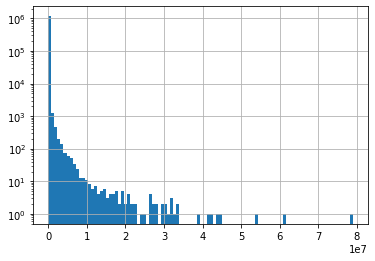

In [ ]:
plt.figure()
artists_df['followers'].hist(bins = 100)
plt.yscale('log')

[]

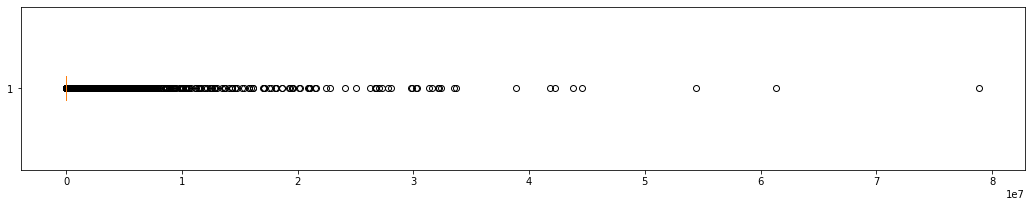

In [ ]:
plt.figure(figsize = (18, 3))
plt.boxplot(artists_df['followers'], vert = False)
plt.plot()

In [ ]:
artists_df[artists_df['followers'] > (artists_df['followers'].mean() + artists_df['followers'].std() * 10)]

,id,followers,genres,name,popularity
1973,35YkpX0zYwHG8vOIhObvxP,2639827.0,"['forro', 'sertanejo', 'sertanejo pop', 'serta...",Mano Walter,65
6431,7jVv8c5Fj3E9VhNjxT4snq,4562300.0,"['country rap', 'lgbtq+ hip hop', 'pop rap', '...",Lil Nas X,89
17540,6IDsZZ4IHgs9VblBgQQSmt,3617747.0,['indonesian pop'],Andmesh,63
56327,3Nipsl6GVwwGyeAk0J29C6,3492917.0,"['funk carioca', 'funk ostentacao', 'funk paul...",MC G15,59
69941,5ZfBThYiIIhL7jHMG8gDB2,3966811.0,['pagode'],Ferrugem,74
...,...,...,...,...,...
774306,4IWBUUAFIplrNtaOHcJPRM,7893527.0,"['pop', 'post-teen pop', 'talent show', 'uk pop']",James Arthur,86
815382,3b8QkneNDz4JHKKKlLgYZg,4273292.0,"['contemporary country', 'country', 'country p...",Florida Georgia Line,83
974794,2hlmm7s2ICUX0LVIhVFlZQ,3071007.0,"['atl hip hop', 'melodic rap', 'rap', 'trap']",Gunna,90
1073145,2iojnBLj0qIMiKPvVhLnsH,5758012.0,"['dance pop', 'pop', 'post-teen pop', 'r&b', '...",Trey Songz,77


In [ ]:
artists_df['popularity'].describe()

count    1.162095e+06
mean     8.795961e+00
std      1.355777e+01
min      0.000000e+00
25%      0.000000e+00
50%      2.000000e+00
75%      1.300000e+01
max      1.000000e+02
Name: popularity, dtype: float64

In [ ]:
artists_df['popularity'].mean()

8.795960743312724

In [ ]:
# Artista con más popularidad
artists_df.loc[artists_df['popularity'] == artists_df['popularity'].max()]

,id,followers,genres,name,popularity
144481,1uNFoZAHBGtllmzznpCI3s,44606973.0,"['canadian pop', 'pop', 'post-teen pop']",Justin Bieber,100


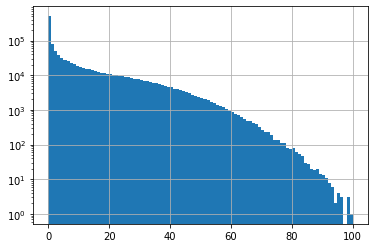

In [ ]:
plt.figure()
artists_df['popularity'].hist(bins = 100)
plt.yscale('log')

# *Tracks*

In [ ]:
# Canción con más popularidad
tracks_df.loc[tracks_df['popularity'] == tracks_df['popularity'].max()]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
93802,4iJyoBOLtHqaGxP12qzhQI,Peaches (feat. Daniel Caesar & Giveon),100.0,198082,1,"['Justin Bieber', 'Daniel Caesar', 'Giveon']","['1uNFoZAHBGtllmzznpCI3s', '20wkVLutqVOYrc0kxF...",2021-03-19,0.677,0.696,0.0,-6.181,1.0,0.119,0.321,0.0,0.42,0.464,90.03,4.0


In [ ]:
# Duracion promedio de canciones
print(tracks_df['duration_ms'].mean()/60000)

3.834186121432987


In [ ]:
# Artistas con más canciones
pref_artists = tracks_df['artists'].value_counts(dropna = False)
pref_artists

['Die drei ???']                   3856
['TKKG Retro-Archiv']              2006
['Benjamin Blümchen']              1503
['Bibi Blocksberg']                1472
['Lata Mangeshkar']                1373
                                   ... 
['IU', 'Jang Yi-jeong']               1
['黃宗澤']                               1
['Vincy Chan', '海鳴威']                 1
['Dough-Boy']                         1
['Gentle Bones', 'Clara Benin']       1
Name: artists, Length: 114030, dtype: int64

<AxesSubplot:>

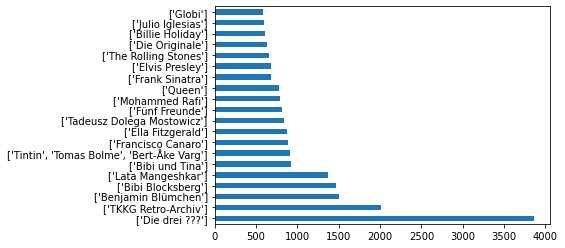

In [ ]:
pref_artists.head(20).plot(kind = 'barh')

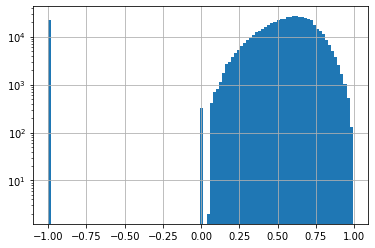

In [ ]:
plt.figure()
tracks_df['danceability'].hist(bins = 100)
plt.yscale('log')

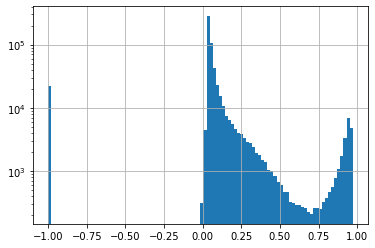

In [ ]:
plt.figure()
tracks_df['speechiness'].hist(bins = 100)
plt.yscale('log')

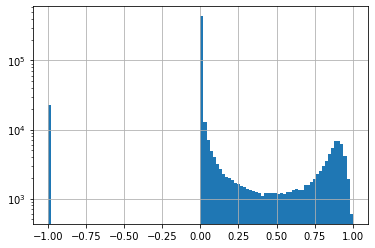

In [ ]:
plt.figure()
tracks_df['instrumentalness'].hist(bins = 100)
plt.yscale('log')

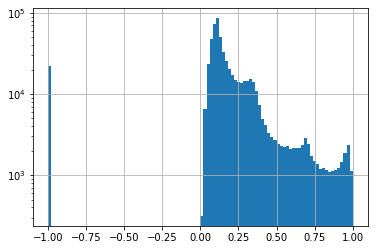

In [ ]:
plt.figure()
tracks_df['liveness'].hist(bins = 100)
plt.yscale('log')

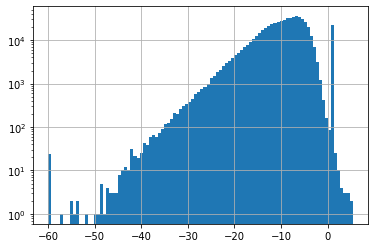

In [ ]:
plt.figure()
tracks_df['loudness'].hist(bins = 100)
plt.yscale('log')

# **Análisis bivariado**



# *Artistas*

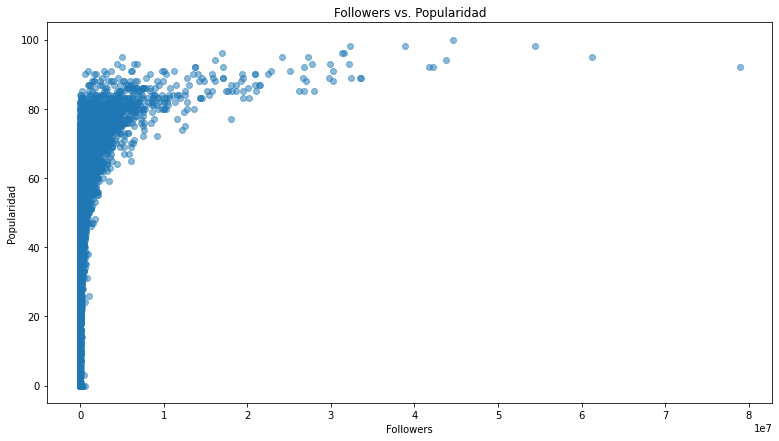

In [ ]:
# Followers vs popularidad
plt.figure(figsize = (13, 7))
plt.scatter(artists_df['followers'], artists_df['popularity'], alpha = 0.5)
plt.title('Followers vs Popularidad')
plt.xlabel('Followers')
plt.ylabel('Popularidad')
plt.show()

In [ ]:
# Correlacion lineal
artists_df[['followers', 'popularity']].corr()

,followers,popularity
followers,1.000000,0.171101
popularity,0.171101,1.000000


In [ ]:
artists_df[['followers', 'popularity']].corr('spearman')

,followers,popularity
followers,1.000000,0.782222
popularity,0.782222,1.000000


# *Tracks*

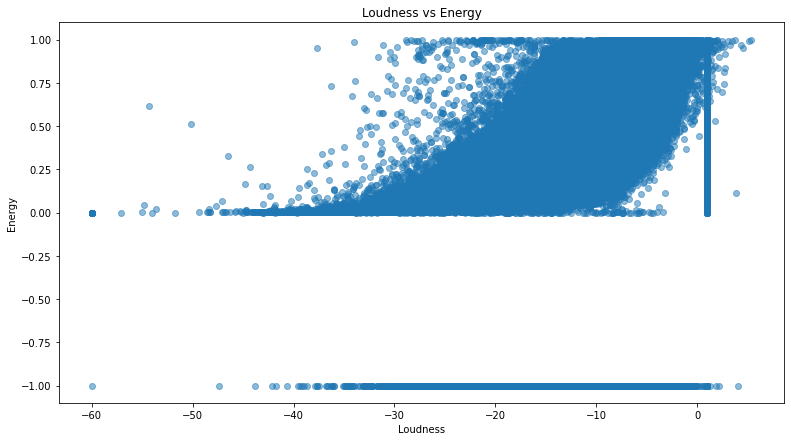

In [ ]:
# Loudness vs energy
plt.figure(figsize = (13, 7))
plt.scatter(tracks_df['loudness'], tracks_df['energy'], alpha = 0.5)
plt.title('Loudness vs Energy')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.show()

In [ ]:
# Correlacion lineal
tracks_df[['loudness', 'energy']].corr()

,loudness,energy
loudness,1.000,0.433
energy,0.433,1.000


In [ ]:
# Correlacion monotona
tracks_df[['loudness', 'energy']].corr('spearman')

,loudness,energy
loudness,1.000000,0.659675
energy,0.659675,1.000000


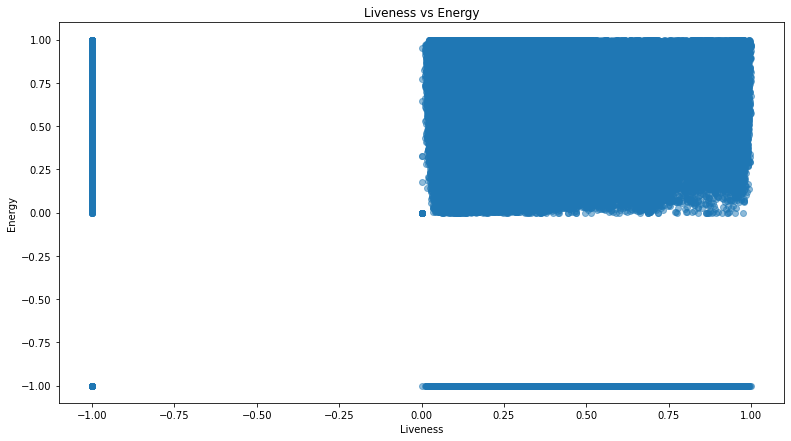

In [ ]:
# Liveness vs energy
plt.figure(figsize = (13, 7))
plt.scatter(tracks_df['liveness'], tracks_df['energy'], alpha = 0.5)
plt.title('Liveness vs Energy')
plt.xlabel('Liveness')
plt.ylabel('Energy')
plt.show()

In [ ]:
# Correlacion lineal
tracks_df[['liveness', 'energy']].corr()

,liveness,energy
liveness,1.000000,0.047772
energy,0.047772,1.000000


In [ ]:
# Correlacion monotona
tracks_df[['liveness', 'energy']].corr('spearman')

,liveness,energy
liveness,1.000000,0.068904
energy,0.068904,1.000000


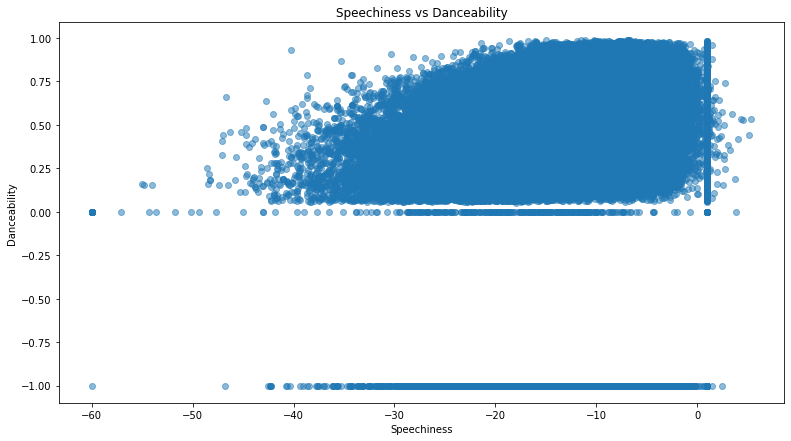

In [ ]:
# Speechiness vs danceability
plt.figure(figsize = (13, 7))
plt.scatter(tracks_df['speechiness'], tracks_df['danceability'], alpha = 0.5)
plt.title('Speechiness vs Danceability')
plt.xlabel('Speechiness')
plt.ylabel('Danceability')
plt.show()

In [ ]:
# Correlacion lineal
tracks_df[['speechiness', 'danceability']].corr()

,speechiness,danceability
speechiness,1.000000,0.057583
danceability,0.057583,1.000000


In [ ]:
# Correlacion monotona
tracks_df[['speechiness', 'danceability']].corr('spearman')

,speechiness,danceability
speechiness,1.00000,0.20042
danceability,0.20042,1.00000


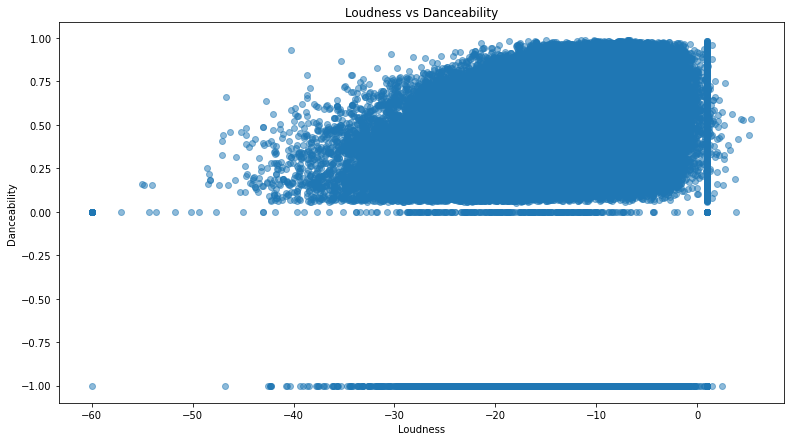

In [ ]:
# Loudness vs danceability
plt.figure(figsize = (13, 7))
plt.scatter(tracks_df['loudness'], tracks_df['danceability'], alpha = 0.5)
plt.title('Loudness vs Danceability')
plt.xlabel('Loudness')
plt.ylabel('Danceability')
plt.show()

In [ ]:
# Correlacion lineal
tracks_df[['loudness', 'danceability']].corr()

,loudness,danceability
loudness,1.000000,0.106123
danceability,0.106123,1.000000


In [ ]:
# Correlacion monotona
tracks_df[['loudness', 'danceability']].corr('spearman')

,loudness,danceability
loudness,1.000000,0.165312
danceability,0.165312,1.000000


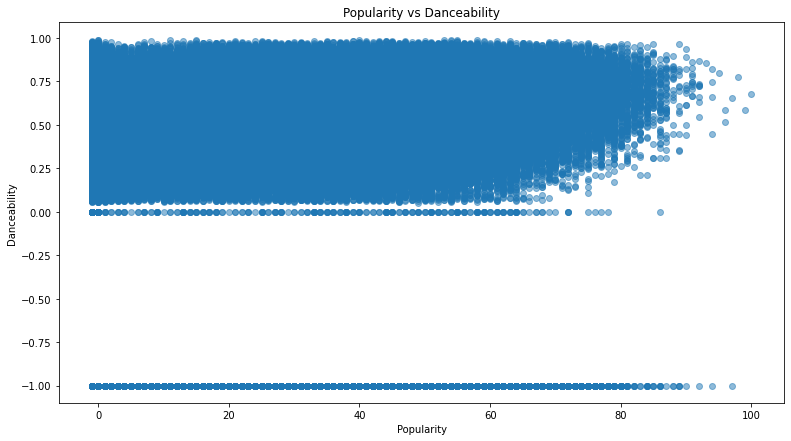

In [ ]:
# Popularity vs danceability
plt.figure(figsize = (13, 7))
plt.scatter(tracks_df['popularity'], tracks_df['danceability'], alpha = 0.5)
plt.title('Popularity vs Danceability')
plt.xlabel('Popularity')
plt.ylabel('Danceability')
plt.show()

In [ ]:
# Correlacion lineal
tracks_df[['popularity', 'danceability']].corr()

,popularity,danceability
popularity,1.000000,0.080776
danceability,0.080776,1.000000


In [ ]:
# Correlacion monotona
tracks_df[['popularity', 'danceability']].corr('spearman')

,popularity,danceability
popularity,1.000000,0.149543
danceability,0.149543,1.000000
